In [147]:
import sys
import os
import skimage
from skimage import io
import numpy as np
import tensorflow
import keras
import keras, keras.layers as L
sys.path.append("..")

In [148]:
#Load images
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels 


images=[]
for filename in os.listdir("Training"):
    img = io.imread(os.path.join("Training",filename))
    images.append(img)
    
x_train=images    
#Preprocess
x_train = [cv2.resize(image, (256, 256)) for image in x_train]
x_train = np.array(x_train)
x_train = x_train.astype('float32') / 255.0 - 0.5

In [149]:
IMG_SHAPE

(256, 256, 3)

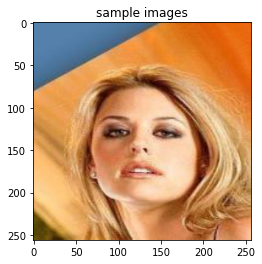

In [150]:
import matplotlib.pyplot as plt

def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))
    
IMG_SHAPE = x_train[0].shape
plt.title('sample images')

show_image(x_train[7])

In [154]:
def build_deep_autoencoder(img_shape):
    """PCA's deeper brother. See instructions above. Use `code_size` in layer definitions."""
    H,W,C = img_shape
    
    # encoder
    encoder = keras.models.Sequential()
    encoder.add(L.InputLayer(img_shape))
    
    ### YOUR CODE HERE: define encoder as per instructions above ###
    encoder.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same'))



    # decoder
    decoder = keras.models.Sequential()

    ### YOUR CODE HERE: define decoder as per instructions above ###
    decoder.add(L.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=2, activation=None, padding='same'))
    
    return encoder, decoder

In [155]:
encoder,decoder = build_deep_autoencoder(IMG_SHAPE)

In [156]:
#autoencoder training

inp = L.Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = keras.models.Model(inp,reconstruction)

encoder.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 32, 32, 256)     

In [157]:
autoencoder.compile('nadam','mse')
autoencoder.fit(x=x_train,y=x_train,epochs=100)

Epoch 1/100
3/3 [==============================] - 10s 3s/step - loss: 0.0806
Epoch 2/100
3/3 [==============================] - 11s 4s/step - loss: 0.0325
Epoch 3/100
3/3 [==============================] - 8s 3s/step - loss: 0.0521
Epoch 4/100
3/3 [==============================] - 9s 3s/step - loss: 0.0183
Epoch 5/100
3/3 [==============================] - 10s 3s/step - loss: 0.0171
Epoch 6/100
3/3 [==============================] - 9s 3s/step - loss: 0.0193
Epoch 7/100
3/3 [==============================] - 9s 3s/step - loss: 0.0130
Epoch 8/100
3/3 [==============================] - 9s 3s/step - loss: 0.0123
Epoch 9/100
3/3 [==============================] - 9s 3s/step - loss: 0.0120
Epoch 10/100
3/3 [==============================] - 9s 3s/step - loss: 0.0154
Epoch 11/100
3/3 [==============================] - 9s 3s/step - loss: 0.0165
Epoch 12/100
3/3 [==============================] - 9s 3s/step - loss: 0.0114
Epoch 13/100
3/3 [==============================] - 9s 3s/step - loss:

KeyboardInterrupt: 

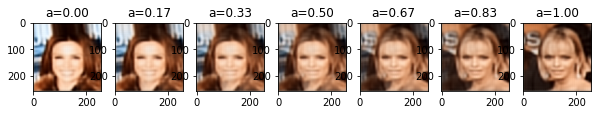

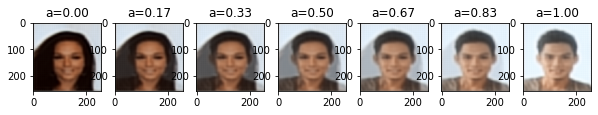

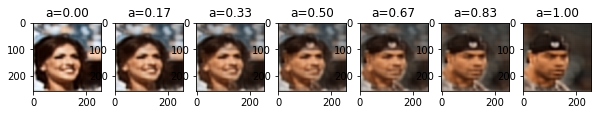

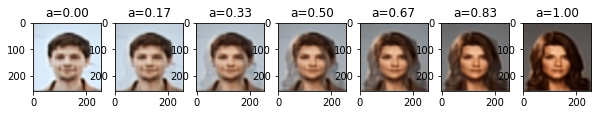

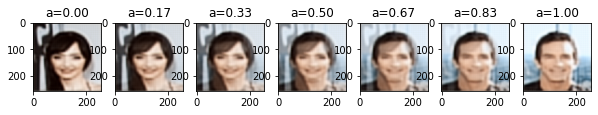

In [158]:
for _ in range(5):
    image1,image2 = x_train[np.random.randint(0,len(x_train),size=2)]

    code1, code2 = encoder.predict(np.stack([image1, image2]))

    plt.figure(figsize=[10,4])
    for i,a in enumerate(np.linspace(0,1,num=7)):

        output_code = code1*(1-a) + code2*(a)
        output_image = decoder.predict(output_code[None])[0]


        plt.subplot(1,7,i+1)
        show_image(output_image)
        plt.title("a=%.2f"%a)
        
    plt.show()